# Import libraries and load dataset IRIS flower

In [1]:
#from sklearn.datasets import load_iris
#dataset=load_iris()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load and Explore Dataset 

In [2]:
dataset=pd.read_csv('D:/GITHUB/Python/iris.csv')

print(dataset.keys())

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset1=dataset.drop(columns=['Id'])
dataset1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#dataset.info()
dataset1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset1['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#  Dataset Analysis

<Axes: >

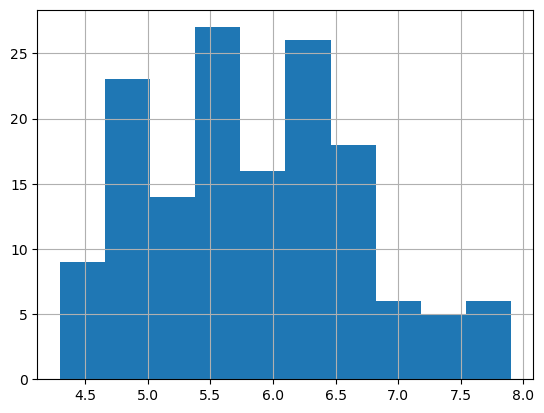

In [7]:
dataset1['SepalLengthCm'].hist()

# Scatter plot

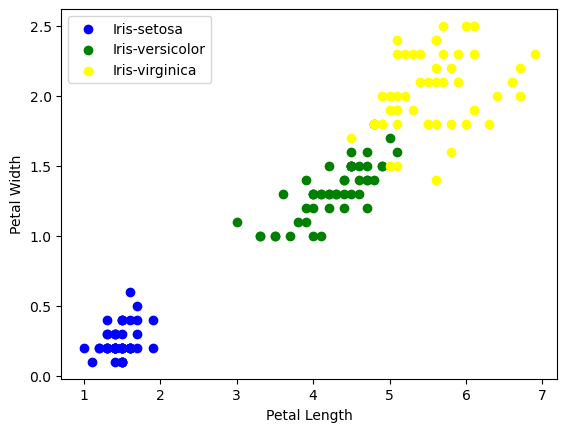

In [8]:
colors=['blue','green','yellow']

species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=dataset[dataset['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()


# Label Encoder

In machine learning, we usually deal with datasets contains multiple labels one or more than one column.These labels can be in form of words or numbers. Label Encoder refers to converting the the labels into nummerical form so as to convert it into machine-readable form.

In [9]:
from sklearn.preprocessing import LabelEncoder
LabE=LabelEncoder()
dataset1['Species']=LabE.fit_transform(dataset1['Species'])
dataset1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Split Dataset into training and testing

In [10]:
x=dataset1.drop(columns=['Species'])
y=dataset1['Species']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)

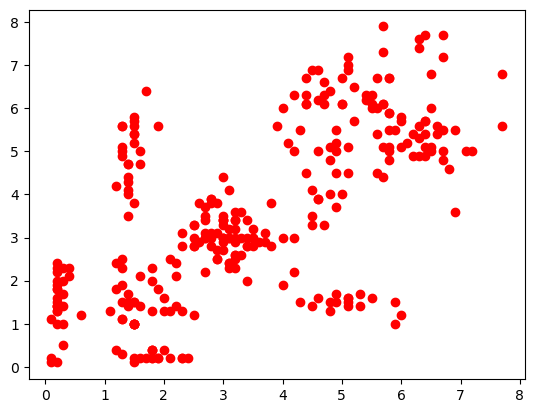

In [11]:
plt.scatter(x_train,x_test,color='red')
plt.show()

In [12]:
print(x_train.shape)
print(y_train.shape)

(75, 4)
(75,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(75, 4)
(75,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()

# Train the KNN classifier on the train dataset

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Make Prediction using the Trained model

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):


In [16]:
newdata=np.array([[5, 2.9, 1, 0.2]])

new=np.array([[5.9,3.0,5.1,1.8]])

pred = knn.predict(x_test)

In [17]:
newdata.shape

(1, 4)

In [18]:
prediction = knn.predict(newdata)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(dataset['Species'][prediction]))


Prediction: [0]
Predicted target name: 0    Iris-setosa
Name: Species, dtype: object


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:
#Performance Parameter
print("Accuracy: ",knn.score(x_test,y_test)*100)

Accuracy:  97.33333333333334


# Performance Metrix Confusion Matrix

In [20]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

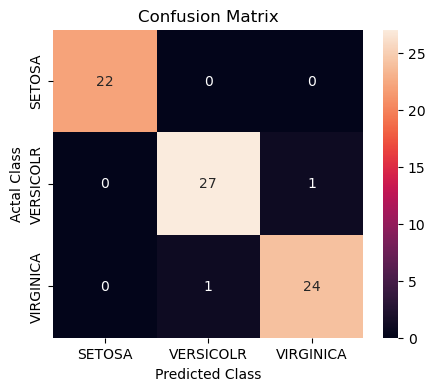

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Class')
plt.xlabel('Predicted Class')
plt.show()
